In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats as stats
import math
import random
import time

*Below cells (commented out) are used to produce NaN rows*

In [2]:
# df = pd.read_csv('advertising_dataset_real.csv')

In [3]:
# df.loc[df.sample(frac=0.168).index, 'Clicked on Ad'] = np.nan

In [4]:
# df.loc[df.sample(frac=0.087).index, 'Daily Internet Usage'] = pd.np.nan

In [5]:
# df.loc[df.sample(frac=0.093).index, 'Daily Time Spent on Site'] = pd.np.nan

In [6]:
# df.loc[df.sample(frac=0.021).index, 'Age'] = pd.np.nan

In [7]:
# df.rename(columns=lambda x: x if x != 'Male' else 'Gender', inplace=True)

In [8]:
# df.to_csv('advertising_dataset.csv')

## 1 
<hr/>

In [9]:
df = pd.read_csv('advertising_dataset.csv', index_col = 'Unnamed: 0')
df.head(10).append(df.tail(10))

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19 14:30:17,0.0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,2016-01-28 20:59:32,0.0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,Male,Australia,2016-03-07 01:40:15,1.0
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,Male,Grenada,2016-04-18 09:33:42,0.0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,Male,Ghana,2016-07-11 01:42:51,0.0


In [10]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    907 non-null float64
Age                         979 non-null float64
Area Income                 1000 non-null float64
Daily Internet Usage        913 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Gender                      1000 non-null object
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               832 non-null float64
dtypes: float64(5), object(5)
memory usage: 66.4+ KB


## 2
<hr>

In [12]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0.0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0.0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1.0
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0.0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0.0


## 3
<hr>

In [13]:
df.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

In [14]:
df[df.columns[:-1]] = df[df.columns[:-1]].fillna(df[df.columns[:-1]].mean())

## 4
<hr>

In [15]:
df['Gender'].value_counts()

0    519
1    481
Name: Gender, dtype: int64

In [16]:
df['Clicked on Ad'].value_counts()

0.0    419
1.0    413
Name: Clicked on Ad, dtype: int64

## 5
<hr>

In [17]:
df[(df['Age'] > 21) & (df['Gender'] == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    514 non-null float64
Age                         514 non-null float64
Area Income                 514 non-null float64
Daily Internet Usage        514 non-null float64
Ad Topic Line               514 non-null object
City                        514 non-null object
Gender                      514 non-null int64
Country                     514 non-null object
Timestamp                   514 non-null object
Clicked on Ad               418 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.1+ KB


## 6, 7
<hr>

In [18]:
tic = time.time()
mean = df.groupby('Clicked on Ad', as_index=False)['Age'].mean()
toc = time.time()
print(mean)
print("vectorized: %f ms" % ((toc - tic) * 1000))

tic = time.time()
mean1 = 0
mean0 = 0
num1 = 0
num0 = 0
for index, row in df.iterrows():
    if row['Clicked on Ad'] == 0:
        mean0 += row['Age']
        num0 += 1
    if row['Clicked on Ad'] == 1:
        mean1 += row['Age']
        num1 += 1
mean0 /= num0
mean1 /= num1
toc = time.time()
print("0: %f 1: %f" % (mean0, mean1))
print("for loop: %f ms" % ((toc - tic) * 1000))

   Clicked on Ad        Age
0            0.0  31.723326
1            1.0  40.295600
vectorized: 79.968214 ms
0: 31.723326 1: 40.295600
for loop: 100.032806 ms


## 8
<hr>

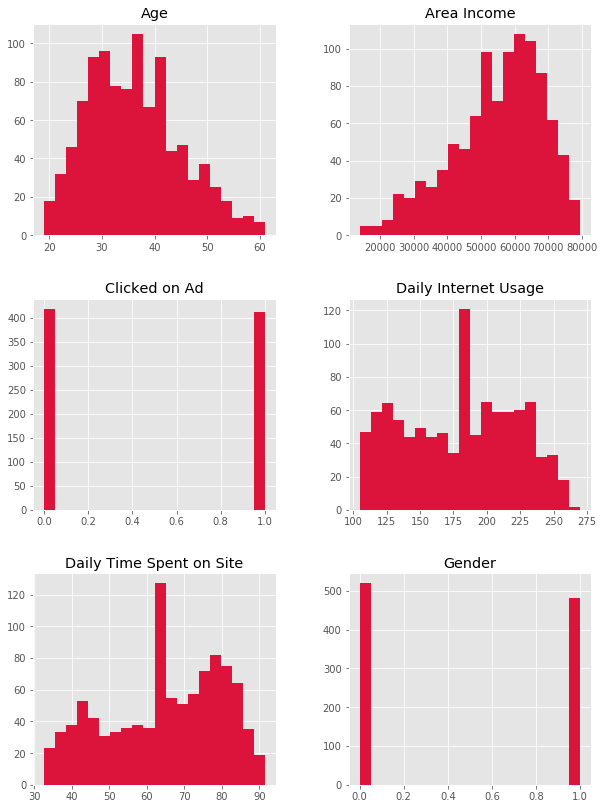

In [19]:
df.hist(figsize = (10,14), color = 'crimson', bins = 20)
plt.show()

## 9
<hr>

In [20]:
def normalize(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [21]:
normalize(df, df._get_numeric_data().columns[:-1])

## 10
<hr>

In [22]:
def plotMeanNorm(df, featureName, targetName, targetValues, targetNames, featureDict):
    for val in targetValues:
        feature = df[df[targetName] == val][featureName]
        mean = feature.mean()
        std = feature.std()
        x = sorted(feature)
        plt.plot(x, stats.norm.pdf(x, mean, std))
        featureDict[val]['mean'] = mean
        featureDict[val]['std'] = std
    plt.title(featureName)
    plt.legend(targetNames)
    plt.show()

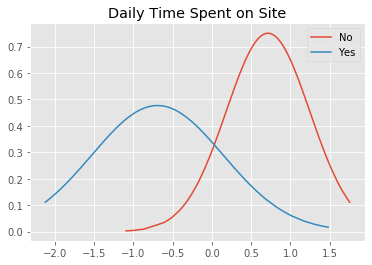

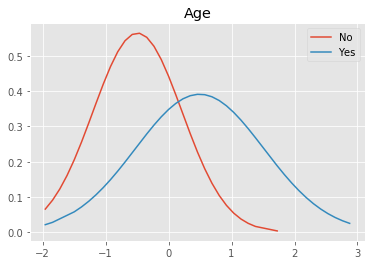

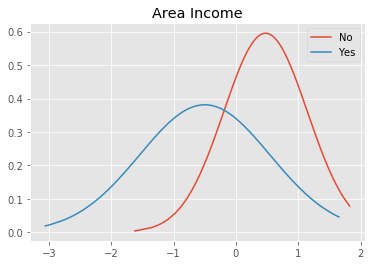

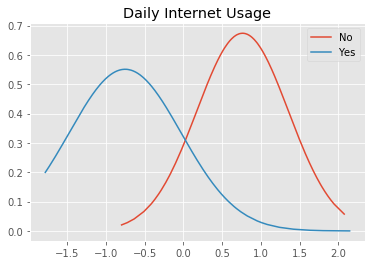

In [23]:
featureStats = {}
dfWithoutNaN = df.drop('Gender', axis = 1).dropna()
for feature in dfWithoutNaN._get_numeric_data().columns[:-1]:
    featureDict = {0: {}, 1: {}}
    plotMeanNorm(dfWithoutNaN, feature, 'Clicked on Ad', [0, 1], ["No", "Yes"], featureDict)
    featureStats[feature] = featureDict

## 11
<hr>

In [24]:
def classify(df, featureDict, targetValues, inp):
    for val in targetValues:
        featureMeanRange = (featureDict[val]['mean'] - featureDict[val]['std'], featureDict[val]['mean'] + featureDict[val]['std'])
        if (inp >= featureMeanRange[0]) and (inp <= featureMeanRange[1]):
            return val
    return targetValues[0]

In [25]:
def predict(df, featureName, featureDict, targetName, targetValues):
    prediction = {}
    for index, row in df.iterrows():
        prediction[index] = classify(df, featureDict, targetValues, row[featureName])
    predictionDf = pd.DataFrame.from_dict(prediction, orient='index', columns=['Prediction'])
    return predictionDf

In [26]:
dfNaN = df[df['Clicked on Ad'].isnull()]
prediction = predict(dfNaN, 'Daily Internet Usage', featureStats['Daily Internet Usage'], 'Clicked on Ad', [0, 1])
prediction.to_csv('prediction_daily_internet_usage.csv')

In [27]:
# prediction = predict(dfNaN, 'Daily Time Spent on Site', featureStats['Daily Time Spent on Site'], 'Clicked on Ad', [0, 1])
# prediction.to_csv('prediction_daily_time_spent_on_site.csv')

## Evaluation (delivery)
<hr>

In [28]:
def evaluate(dfReal, dfPredict):
    dfCompare = pd.concat((dfReal[df['Clicked on Ad'].isnull()][['Clicked on Ad']], dfPredict), axis=1)
    truePredictions = np.count_nonzero((dfCompare['Clicked on Ad'] == dfCompare['Prediction']))
    total = len(dfPredict.axes[0])
    accuracy = truePredictions / total * 100
    print('accuracy: %.2f' % accuracy, '%')

In [39]:
dfReal = pd.read_csv('advertising_dataset_real.csv')
dfPredict = pd.read_csv('prediction_daily_internet_usage.csv', index_col='Unnamed: 0')
evaluate(dfReal, dfPredict)

accuracy: 87.50 %


In [35]:
dfPredict = pd.read_csv('prediction_daily_time_spent_on_site.csv', index_col='Unnamed: 0')
evaluate(dfReal, dfPredict)

accuracy: 73.21 %


In [31]:
featureStats

{'Daily Time Spent on Site': {0: {'mean': 0.7141040932229988,
   'std': 0.5313689387678912},
  1: {'mean': -0.6917831722972694, 'std': 0.8361610114854059}},
 'Age': {0: {'mean': -0.49314845603668833, 'std': 0.7063146454191541},
  1: {'mean': 0.4932105470389866, 'std': 1.019267520705244}},
 'Area Income': {0: {'mean': 0.4763668327659723, 'std': 0.6704761762169467},
  1: {'mean': -0.4986318539824453, 'std': 1.0461990555400822}},
 'Daily Internet Usage': {0: {'mean': 0.7642163719611866,
   'std': 0.592057888773502},
  1: {'mean': -0.7533953136510781, 'std': 0.7239588576012945}}}